# FeedForward Neural Network in TensorFlow

## 1.1 Introduction

The feedforward neural network was the first and simplest type of artificial neural network. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network.
<img src="images/07_mlp.png">

There are types of FeedForward Neural Network:
<ol>
    <li>Single layer feed-forward neural network</li>
    <li>Mulitlayer feed-forward neural network</li>
</ol>

## 1.2 Dataset
we are going to use MNIST for this task, which consists 28x28 pixel images from 0 to 9 digits.

## 1.3 Model
<img src="images/07_mnist_mlp.png">

## 1.4 Code

### Imports

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

### Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Visualizing the MNIST images

Shape of Images:  (60000, 28, 28)
Shape of Labels: (60000,)


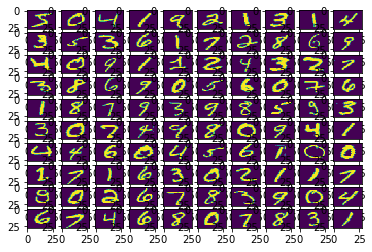

In [3]:
print("Shape of Images: ", x_train.shape)
print("Shape of Labels:" , y_train.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k], aspect='auto') 
        k += 1
plt.show()

### Hyperparameters

In [4]:
learning_rate = 0.01
training_epochs = 10
batch_size = 32
display_step = 1

n_hidden_1 = 128
n_hidden_2 = 32
n_input = 784
n_output = 10

### Formating Dataset

In [5]:
def to_onehot(y):
    data = np.zeros((n_output))
    data[y] = 1
    return data

x_train = np.reshape(x_train, (-1, n_input))
x_test = np.reshape(x_test, (-1, n_input))

y_train = np.array([to_onehot(y) for y in y_train])
y_test = np.array([to_onehot(y) for y in y_test])

### Model Placeholders

In [6]:
# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

### Parameters of the model

In [7]:
# Weight
W1 = tf.Variable(tf.random_uniform([n_input, n_hidden_1], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([n_hidden_1, n_hidden_2], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([n_hidden_2, n_output], -1.0, 1.0))

# Bias
b1 = tf.Variable(tf.zeros([n_hidden_1]))
b2 = tf.Variable(tf.zeros([n_hidden_2]))
b3 = tf.Variable(tf.zeros([n_output]))

### Creating the model

In [8]:
# Create model
def multilayer_perceptron(x):
    l0 = x
    l1 = tf.nn.sigmoid(tf.matmul(l0, W1) + b1)
    l2 = tf.nn.sigmoid(tf.matmul(l1, W2) + b2)
    l3 = tf.matmul(l2, W3) + b3
    return l3

In [9]:
# Construct model
logits = multilayer_perceptron(X)
pred = tf.nn.softmax(logits)

### Defining the loss & optimizer

In [10]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()

### Defining the Accuracy function

In [11]:
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
    acc = (100.0 * correctly_predicted) / predictions.shape[0] 
    return acc

### Training the Model

In [12]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        avg_acc = 0.0
        total_batch = len(x_train)//batch_size
        
        for i in range(total_batch):
            batch_x = x_train[i:i+1*batch_size]
            batch_y = y_train[i:i+1*batch_size]
            
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
            avg_cost += c/total_batch
            
            pred_y = sess.run(logits, feed_dict={X: batch_x})
            acc = accuracy(pred_y, batch_y)
            avg_acc += acc/total_batch
            
            
        if (epoch+1) % display_step == 0:
            test_loss = sess.run(loss_op, feed_dict={X: x_test, Y: y_test})
            pred_y = sess.run(pred, feed_dict={X: x_test})
            test_acc = accuracy(pred_y, y_test)
            
            print("Epoch: {:2.0f} - Loss: {:1.5f} - Acc: {:2.5f} - Test Loss: {:1.5f} - Test Acc: {:2.5f}".format(
                epoch+1, avg_cost, avg_acc, test_loss, test_acc))
            
    print("Optimization Finshed")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", acc.eval({X: x_test, Y: y_test}))

Epoch:  1 - Loss: 1.99440 - Acc: 36.38833 - Test Loss: 1.52633 - Test Acc: 52.60000
Epoch:  2 - Loss: 1.17569 - Acc: 66.84167 - Test Loss: 1.10331 - Test Acc: 67.72000
Epoch:  3 - Loss: 0.84590 - Acc: 78.68167 - Test Loss: 0.89848 - Test Acc: 73.41000
Epoch:  4 - Loss: 0.66582 - Acc: 83.74833 - Test Loss: 0.78307 - Test Acc: 76.45000
Epoch:  5 - Loss: 0.55202 - Acc: 86.28500 - Test Loss: 0.71077 - Test Acc: 78.30000
Epoch:  6 - Loss: 0.47164 - Acc: 88.68167 - Test Loss: 0.66111 - Test Acc: 79.64000
Epoch:  7 - Loss: 0.41044 - Acc: 90.66167 - Test Loss: 0.62471 - Test Acc: 80.52000
Epoch:  8 - Loss: 0.36164 - Acc: 92.12333 - Test Loss: 0.59691 - Test Acc: 81.26000
Epoch:  9 - Loss: 0.32159 - Acc: 93.25667 - Test Loss: 0.57504 - Test Acc: 81.74000
Epoch: 10 - Loss: 0.28809 - Acc: 93.98500 - Test Loss: 0.55746 - Test Acc: 82.47000
Optimization Finshed
Test Accuracy: 0.8247
